In [13]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import scipy.sparse.linalg as linalg
from scipy.stats import norm

In [14]:

# Classe résolvant Burgers avec des volumes finis 1D (cours P. Helluy)
class Burgers:
    def __init__(self,Nx):
        self.Nx=Nx  # nb mailles
        self.a=0.0  # bord gauche du domaine
        self.b=1.0  # bord droit du domaine
        self.dt=0.0

        # Pour le maillage Nx mailles et 2 maillages fantome a gauche et droite pour les conditions limites
        self.h=(self.b-self.a)/self.Nx  # pas de maillage
        self.begin = 1  # numéro de la première maille non fantome
        self.end=  self.Nx+1  # numéro de la dernière maille non fantome  
        
        self.nodes=np.linspace(self.a-self.h,self.b+self.h,self.Nx+3) 
        #listes des noeuds: n+1 noeuds et 2 noeuds fantomes
        self.cells=np.linspace(self.a-0.5*self.h,self.b+0.5*self.h,self.Nx+2)
        #listes des centres de mailles: n centres et 2 centres fantomes
        self.rho= np.zeros(self.Nx+2) ## rho sur le maillage + mailles fantomes
    
    #fonction pour initialiser rho
    def init(self,vmax,r_R):
        x0=0.5*(self.a+self.b)
        self.r_R = r_R
        self.vmax = vmax
        self.rhomax = 1.0
        for i in range(0,len(self.rho)):
            if self.cells[i]<x0:
                self.rho[i]=self.r_R
            else: 
                self.rho[i]=0.5
                    
        # on conserve le rho initiale
        self.rho_0=cp.copy(self.rho)

    # flux volumes finis de Lax-Friedrichs
    def flux_hyp(self,rl,rr):
        vl=self.vmax*(1.0-rl/self.rhomax)
        vr=self.vmax*(1.0-rr/self.rhomax)
        center = 0.5*(0.5*rl*vl+0.5*rr*vr)
        vel = max(abs(self.vmax*(1.0-2.0*rl/self.rhomax)),abs(self.vmax*(1.0-2.0*rr/self.rhomax)))
        visco=0.5*vel*(rl-rr)
        return center+visco
    
    # plot de rho_0 et de rho
    def plot(self):
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        axes[0].plot(self.cells[self.begin:self.end],self.rho_0[self.begin:self.end],'ro-')
        axes[1].plot(self.cells[self.begin:self.end],self.rho[self.begin:self.end],'bo-')
        
    # condition limite dans les mailles fantomes selon le cas test. A expliquer
    def bc(self):
        self.rho[0]=self.rho[1]
        self.rho[-1]=self.rho[-2]
    
    # Résolution de l'équation en temps
    # A est un opérateur linéaire associée à la matrice implicite (le produit matrice vecteur)
    # on a pas besoin de construire la matrice pour résoudre un problème avec le gradient conjugé.
    # Il suffit juste de donner ce produit matrice vecteur
    def solve(self,T):
        nt = 0
        time = 0.0
        rho_temp = np.zeros(self.Nx)
        while time < T:
            # vitesse max de l'équation utile pour CFL
            vmax=max(abs(self.vmax*(1.0-2.0*self.rho[self.begin:self.end]/self.rhomax)))
            self.dt= 0.5*self.h/vmax
            self.bc()
            for i in range(0,self.Nx):
                # calcul des conditions limites dans la mailles fantomes
                rhol = self.rho[self.begin+i-1]
                rhoc = self.rho[self.begin+i]
                rhor = self.rho[self.begin+i+1]
                # calcul des flux explicite
                fh=self.flux_hyp(rhoc,rhor)-self.flux_hyp(rhol,rhoc)
                # schéma en temps explicite
                rho_temp[i]=rhoc -self.dt/self.h*fh
        
            self.rho[self.begin:self.end]=rho_temp
            time=time+self.dt
            nt=nt+1
            #print(self.rho)


C:\Users\axeld\AppData\Local\Temp\ipykernel_24696\2004404414.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.rho[i]=self.r_R
C:\Users\axeld\AppData\Local\Temp\ipykernel_24696\2004404414.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rho_temp[i]=rhoc -self.dt/self.h*fh


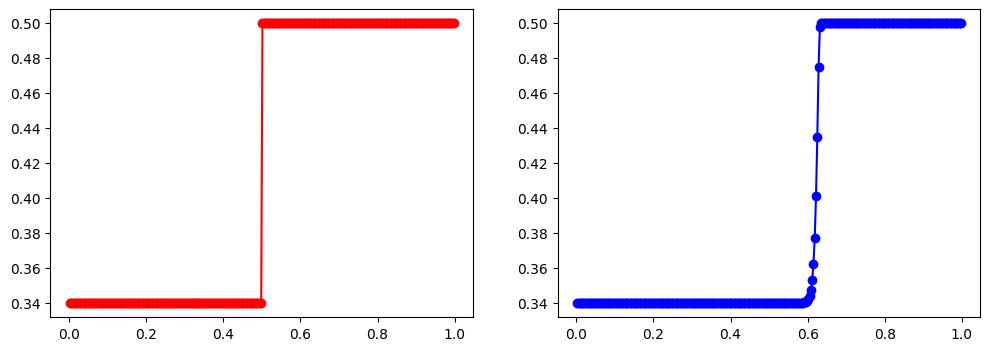

In [15]:
vmax =np.random.normal(0.8,0.03,1)
r_R= np.random.uniform(0.2,0.35,1)

bg=Burgers(300)
bg.init(vmax,r_R)
bg.solve(2)
bg.plot()

Code écrit par E. Franck

Code modifié puis suite : 

In [16]:

# Classe résolvant Burgers avec des volumes finis 1D (cours P. Helluy)
class Burgers:
    def __init__(self,Nx,xc,rout):
        self.Nx=Nx  # nb mailles
        self.a=0.0  # bord gauche du domaine
        self.b=1.0  # bord droit du domaine
        self.dt=0.0


        ##### ajout
        self.x_c = xc 
        self.r_out = rout
        ####

        # Pour le maillage Nx mailles et 2 maillages fantome a gauche et droite pour les conditions limites
        self.h=(self.b-self.a)/self.Nx  # pas de maillage
        self.begin = 1  # numéro de la première maille non fantome
        self.end=  self.Nx+1  # numéro de la dernière maille non fantome  
        
        self.nodes=np.linspace(self.a-self.h,self.b+self.h,self.Nx+3) 
        #listes des noeuds: n+1 noeuds et 2 noeuds fantomes
        self.cells=np.linspace(self.a-0.5*self.h,self.b+0.5*self.h,self.Nx+2)
        #listes des centres de mailles: n centres et 2 centres fantomes
        self.rho= np.zeros(self.Nx+2) ## rho sur le maillage + mailles fantomes
    
    #fonction pour initialiser rho
    def init(self,vmax,r_R):
        ####
        x0=self.x_c*(self.a+self.b)
        ####
        self.r_R = r_R # r_in selon le sujet 
        self.vmax = vmax
        self.rhomax = 1.0
        for i in range(0,len(self.rho)):
            if self.cells[i]<x0:
                self.rho[i]=self.r_R
            else: 
                ####
                self.rho[i]=self.r_out
                #### 
                    
        # on conserve le rho initiale
        self.rho_0=cp.copy(self.rho)

    # flux volumes finis de Lax-Friedrichs
    def flux_hyp(self,rl,rr):
        vl=self.vmax*(1.0-rl/self.rhomax)
        vr=self.vmax*(1.0-rr/self.rhomax)
        center = 0.5*(0.5*rl*vl+0.5*rr*vr)
        vel = max(abs(self.vmax*(1.0-2.0*rl/self.rhomax)),abs(self.vmax*(1.0-2.0*rr/self.rhomax)))
        visco=0.5*vel*(rl-rr)
        return center+visco
    
    # plot de rho_0 et de rho
    def plot(self):
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        axes[0].plot(self.cells[self.begin:self.end],self.rho_0[self.begin:self.end],'ro-')
        axes[1].plot(self.cells[self.begin:self.end],self.rho[self.begin:self.end],'bo-')
        
    # condition limite dans les mailles fantomes selon le cas test. A expliquer
    def bc(self):
        self.rho[0]=self.rho[1]
        self.rho[-1]=self.rho[-2]
    
    # Résolution de l'équation en temps
    # A est un opérateur linéaire associée à la matrice implicite (le produit matrice vecteur)
    # on a pas besoin de construire la matrice pour résoudre un problème avec le gradient conjugé.
    # Il suffit juste de donner ce produit matrice vecteur
    def solve(self,T):
        nt = 0
        time = 0.0
        rho_temp = np.zeros(self.Nx)
        while time < T:
            # vitesse max de l'équation utile pour CFL
            vmax=max(abs(self.vmax*(1.0-2.0*self.rho[self.begin:self.end]/self.rhomax)))
            self.dt= 0.5*self.h/vmax
            self.bc()
            for i in range(0,self.Nx):
                # calcul des conditions limites dans la mailles fantomes
                rhol = self.rho[self.begin+i-1]
                rhoc = self.rho[self.begin+i]
                rhor = self.rho[self.begin+i+1]
                # calcul des flux explicite
                fh=self.flux_hyp(rhoc,rhor)-self.flux_hyp(rhol,rhoc)
                # schéma en temps explicite
                rho_temp[i]=rhoc -self.dt/self.h*fh
        
            self.rho[self.begin:self.end]=rho_temp
            time=time+self.dt
            nt=nt+1
            #print(self.rho)

C:\Users\axeld\AppData\Local\Temp\ipykernel_24696\848073724.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.rho[i]=self.r_R
C:\Users\axeld\AppData\Local\Temp\ipykernel_24696\848073724.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rho_temp[i]=rhoc -self.dt/self.h*fh


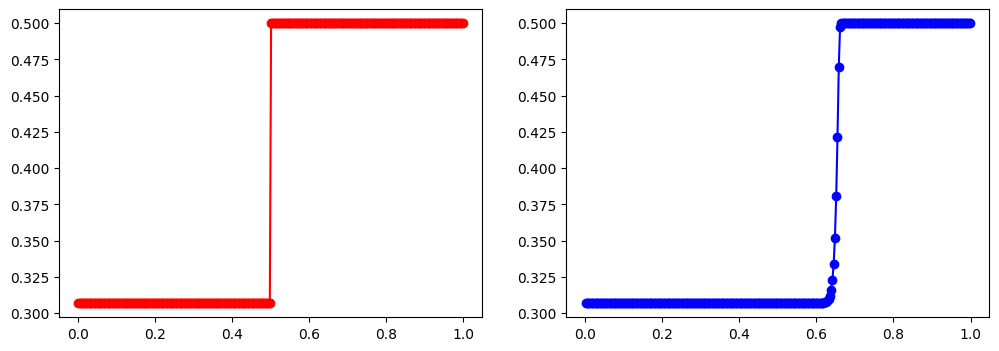

In [17]:
vmax = np.random.normal(0.8, 0.03, 1)
rin = np.random.uniform(0.2, 0.35, 1)
rout = 0.5
xC = 0.5

bg = Burgers(300, xC, rout)
bg.init(vmax, rin)
bg.solve(2)
bg.plot()


On obtient le même résultat en ayant rajouter rout et xC en paramètre 

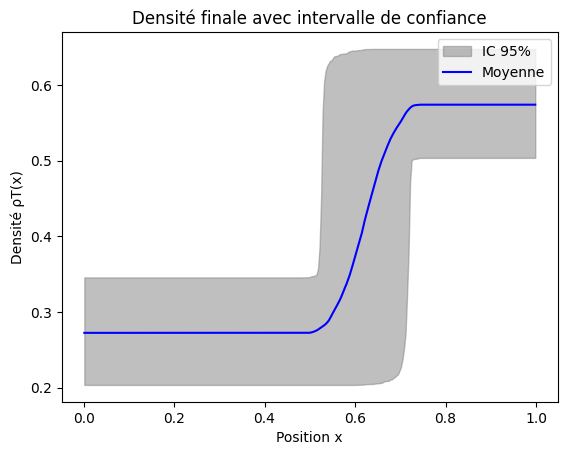

In [ ]:
N = 100
Nx = 300
T = 2

# Stocker les résultats
rho_results = np.zeros((N, Nx))

# Monte-Carlo
for i in range(N):
    vmax = np.random.normal(0.8, 0.03)
    rin = np.random.uniform(0.2, 0.35)
    rout = np.random.uniform(0.5, 0.65)
    xC = 0.5
    
    bg = Burgers(Nx, xC, rout)
    bg.init(vmax, rin)
    bg.solve(T)
    
    rho_results[i, :] = bg.rho[bg.begin:bg.end]

# Calcul des statistiques
rho_mean = np.mean(rho_results, axis=0)
rho_lower = np.percentile(rho_results, 2.5, axis=0)
rho_upper = np.percentile(rho_results, 97.5, axis=0)

# Affichage des résultats
x = bg.cells[bg.begin:bg.end]
plt.fill_between(x, rho_lower, rho_upper, color='gray', alpha=0.5, label='IC 95%')
plt.plot(x, rho_mean, 'b-', label='Moyenne')
plt.xlabel('Position x')
plt.ylabel('Densité ρT(x)')
plt.legend()
plt.title('Densité finale avec intervalle de confiance')
plt.show()

Ici on observe une augmentation de la densité de voiture dans le bouchon vu que le flux entrant est plus gros que le sortant.

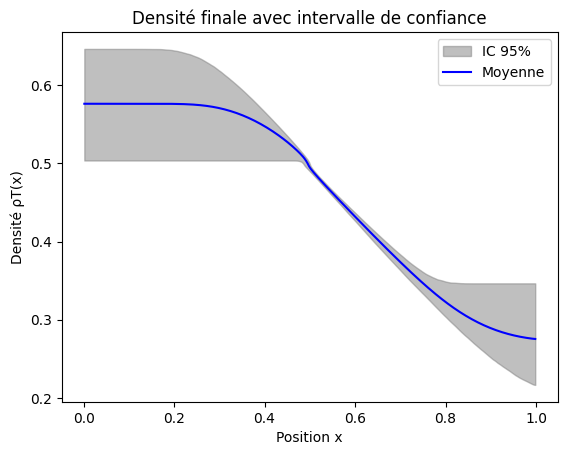

In [19]:
N = 100
Nx = 300
T = 2

# Stocker les résultats
rho_results = np.zeros((N, Nx))

# Monte-Carlo
for i in range(N):
    vmax = np.random.normal(0.8, 0.03)
    rout = np.random.uniform(0.2, 0.35)
    rin = np.random.uniform(0.5, 0.65)
    xC = 0.5
    
    bg = Burgers(Nx, xC, rout)
    bg.init(vmax, rin)
    bg.solve(T)
    
    rho_results[i, :] = bg.rho[bg.begin:bg.end]

# Calcul des statistiques
rho_mean = np.mean(rho_results, axis=0)
rho_lower = np.percentile(rho_results, 2.5, axis=0)
rho_upper = np.percentile(rho_results, 97.5, axis=0)

# Affichage des résultats
x = bg.cells[bg.begin:bg.end]
plt.fill_between(x, rho_lower, rho_upper, color='gray', alpha=0.5, label='IC 95%')
plt.plot(x, rho_mean, 'b-', label='Moyenne')
plt.xlabel('Position x')
plt.ylabel('Densité ρT(x)')
plt.legend()
plt.title('Densité finale avec intervalle de confiance')
plt.show()

En échangeant les lois de r_in et r_out on obtient ce graphe ,On observe alors bien le phénomène que la circulation est compliqué jusqu'à xC  mais après cela se passe très fluidement sans perturbation les voitures sortent plus rapidement qu'elles n'entrent avec un débouchenement progressif.

3) Maintenant on essaye d'observer le comportement de Burger's a T  qui tend vers l'inf

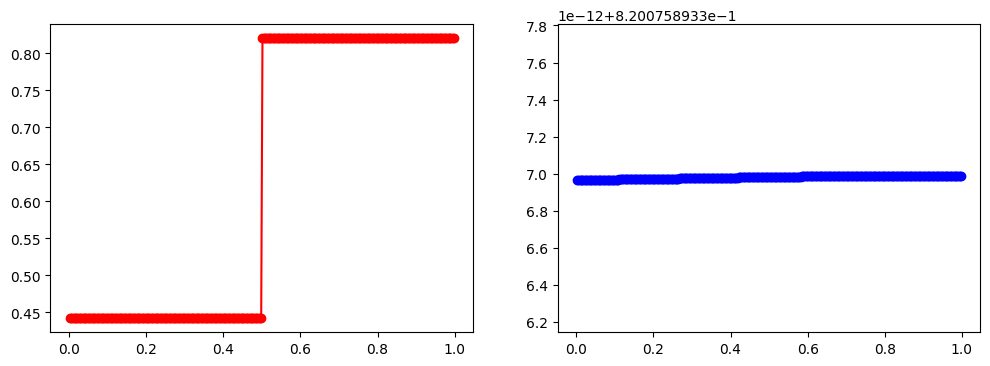

In [20]:
vmax = np.random.normal(0.7, 0.0)
rout = np.random.uniform(0.5, 0.9)
rin = np.random.uniform(0.1, 0.5)
xC = np.random.uniform(0.2,0.8)

bg = Burgers(300, xC, rout)
bg.init(vmax, rin)
bg.solve(30)
bg.plot()


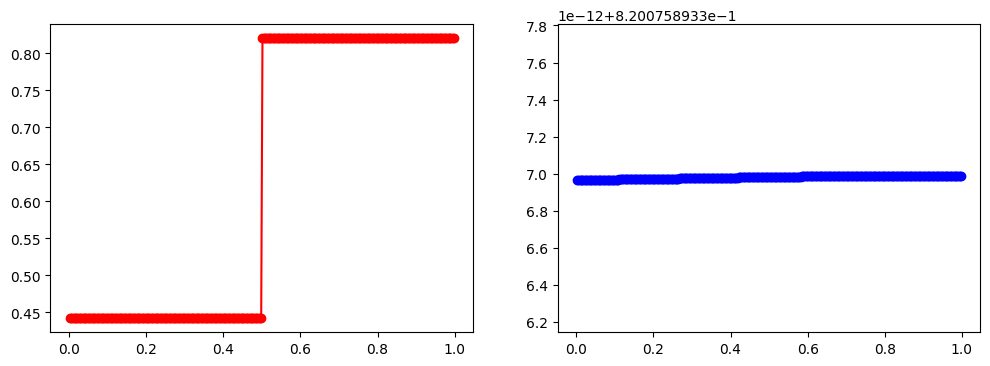

In [21]:
bg.solve(100)
bg.plot()

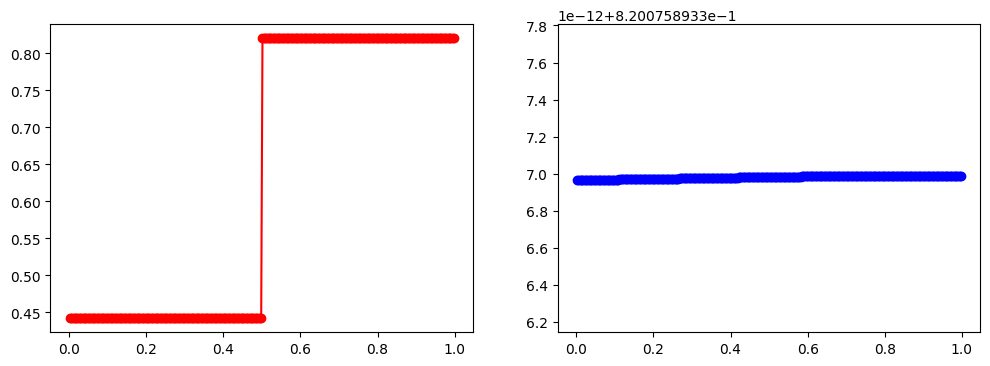

In [22]:
bg.solve(200)
bg.plot()

On observe que rho_t tend de plus en plus vers un seuil de stabilité pour 

la loi limite de rho_t serait donc :

x < x_c : rho_t(x) -> r_in

x > x_c : rho_t(x) -> r_out 


4) On estime ici que le bouchon est  résorbé lorsque la densité de voiture devient uniforme comme montré sur les cas limites au dessus.
Maintenant on calcule l'esperance, la variance et l'interval de confiance par Monte-Carlo 

On résous pour chaque temps T burgers et on regarde le temps Y nécessaire pour atteindre un seuil de stabilité.

In [23]:

# Paramètres
N = 100  
epsilon = 1e-3  # Seuil pour la résorption du bouchon
times = np.linspace(0, 10, 40)  
Y = []

# Simulation Monte-Carlo
for _ in range(N):
    # Paramètres burgers 
    vmax = np.random.normal(0.7, 0.05)
    rin = np.random.uniform(0.1, 0.5)
    rout = np.random.uniform(0.5, 0.9)
    xC = np.random.uniform(0.2, 0.8)

    bg = Burgers(300, xC, rout)
    bg.init(vmax, rin)
    
    # Résousdre pour tout les temps demander
    for T in times:
        bg.solve(T)
        rho_mean = np.mean(bg.rho[bg.begin:bg.end])
        max_diff = np.max(np.abs(bg.rho[bg.begin:bg.end] - rho_mean))
        if max_diff < epsilon:
            Y.append(T)
            break



In [24]:
# Estimations
Y = np.array(Y)
Y_mean = np.mean(Y)
Y_var = np.var(Y)
z = norm.ppf(0.975)
confidence_interval = (Y_mean - z * np.sqrt(Y_var / N), Y_mean + z * np.sqrt(Y_var / N))
# on prend z ici car c'est la valeur la valeur critique au seuil 0.975 d'une loi normal que l'on utilise ici du au théorème central limite 

# Affichage des résultats
print(f"Espérance de Y : {Y_mean:.4f}")
print(f"Variance de Y : {Y_var:.4f}")
print(f"Intervalle de confiance à 95% : {confidence_interval}")

Espérance de Y : 3.0135
Variance de Y : 2.1893
Intervalle de confiance à 95% : (2.7234779994967773, 3.3034847284968776)


5) Indices de Sobol

In [41]:

# Paramètres pour Sobol
N = 50 
k = 4 
T_max = 5
epsilon = 1e-3  
Nx = 200  


A = np.zeros((N, k))
B = np.zeros((N, k))
# generation des vmax rin rout xC
A[:, 0] = np.random.normal(0.7, 0.05, size=N)  # vmax
A[:, 1] = np.random.uniform(0.1, 0.5, size=N)  # rin
A[:, 2] = np.random.uniform(0.5, 0.9, size=N)  # rout
A[:, 3] = np.random.uniform(0.2, 0.8, size=N)  # xC

B[:, 0] = np.random.normal(0.7, 0.05, size=N)
B[:, 1] = np.random.uniform(0.1, 0.5, size=N)
B[:, 2] = np.random.uniform(0.5, 0.9, size=N)
B[:, 3] = np.random.uniform(0.2, 0.8, size=N)

# Évaluation des matrices A et B
Y_A = np.zeros(N)
Y_B = np.zeros(N)




In [42]:
# Calcul des indices de Sobol
S = np.zeros(k)
ST = np.zeros(k)


for i in range(k):
    # Créer les matrices Y 
    A_new = np.delete(A, i, axis=1)
    col_i_a = A[:, i].reshape(-1, 1)
    Y = np.concatenate([col_i_a,A_new],axis=1) # On a ici Y = Q(Xi, X_i) i = 3 (X3,X1,X2,X4)

    B_new = np.delete(B, i, axis=1)
    col_i_b = B[:, i].reshape(-1, 1)
    Yi = np.concatenate([col_i_a,B_new],axis=1) #Y^i X3,X1',X2',X4'

    Y_i = np.concatenate([col_i_b,A_new],axis=1) # Y^-1 X3' X1,X2,X4

    # Évaluation des matrices y
    T_Y = np.zeros(N)
    T_Yi = np.zeros(N)
    T_Y_i = np.zeros(N)

    for j in range(N):
        #calcul avec Y
        vmax, rin, rout, xC = Y[j, :]
        bg = Burgers(Nx,xC,rout)
        bg.init(vmax, rin)
    
        time = 0.0
        while time < T_max:
            bg.solve(time)
            rho_mean = np.mean(bg.rho[bg.begin:bg.end])
            max_diff = np.max(np.abs(bg.rho[bg.begin:bg.end] - rho_mean))
            if max_diff < epsilon:
                T_Y[j] = time
                break
            time += 0.1
        if time >= T_max:
            T_Y[j] = T_max

        #calcul avec Yi
        vmax, rin, rout, xC = Yi[j, :]
        bg = Burgers(Nx,xC,rout)
        bg.init(vmax, rin)
    
        time = 0.0
        while time < T_max:
            bg.solve(time)
            rho_mean = np.mean(bg.rho[bg.begin:bg.end])
            max_diff = np.max(np.abs(bg.rho[bg.begin:bg.end] - rho_mean))
            if max_diff < epsilon:
                T_Yi[j] = time
                break
            time += 0.1
        if time >= T_max:
            T_Yi[j] = T_max


        #calcul avec Y_i
        vmax, rin, rout, xC = Y_i[j, :]
        bg = Burgers(Nx,xC,rout)
        bg.init(vmax, rin)
    
        time = 0.0
        while time < T_max:
            bg.solve(time)
            rho_mean = np.mean(bg.rho[bg.begin:bg.end])
            max_diff = np.max(np.abs(bg.rho[bg.begin:bg.end] - rho_mean))
            if max_diff < epsilon:
                T_Y_i[j] = time
                break
            time += 0.1
        if time >= T_max:
            T_Y_i[j] = T_max
            
    # Calcul des indices de Sobol
    cov =  np.cov(T_Y, T_Yi)[0, 1]
    S[i] = cov /np.var(T_Y)
    
    ST[i] = np.mean((T_Y - T_Y_i) ** 2) / np.var(T_Y)

# Résultats
print("Indices de Sobol individuels (S) :", S)
print("Indices de Sobol totaux (ST) :", ST)
    
    


C:\Users\axeld\AppData\Local\Temp\ipykernel_24696\2904059799.py:78: RuntimeWarning: invalid value encountered in scalar divide
  S[i] = cov /np.var(T_Y)
C:\Users\axeld\AppData\Local\Temp\ipykernel_24696\2904059799.py:80: RuntimeWarning: invalid value encountered in scalar divide
  ST[i] = np.mean((T_Y - T_Y_i) ** 2) / np.var(T_Y)


Indices de Sobol individuels (S) : [0.0848636  0.18479192        nan        nan]
Indices de Sobol totaux (ST) : [0.00918504 0.40425524        nan        nan]


6) Ici j'essaye De calculer les indices de Sobol grace au Krigeage. J'utilise alors openturns, Mais écrire l'equation avec des dérivées grâce a SymbolicFunction de Openturns n'est pas isponible

In [2]:
import openturns as ot

# Définition des paramètres
parameters = ["rin", "rout", "vmax", "xC"]


rho_max = 1.0  
vmax = "vmax"
rho = "rho"
x = "x"
v_rho = f"{vmax} * (1 - {rho} / {rho_max})"
eq_burgers = f"({rho}) + d({rho} * ({v_rho}), {x})"

burgers_function = ot.SymbolicFunction(parameters, [eq_burgers])

rin = ot.Uniform(0.2, 0.35)  
rout = ot.Uniform(0.5, 0.65)  
vmax = ot.Normal(0.8, 0.03)  
xC = ot.Uniform(0.2, 0.8)  


distributions = [rin, rout, vmax, xC]
# Définir la copule et la distribution composée
R = ot.CorrelationMatrix(4)  
copula = ot.NormalCopula(R)
myDistribution = ot.ComposedDistribution(distributions, copula)





In [3]:
import openturns as ot
import numpy as np

sampleSize_train = 100
X_train = myDistribution.getSample(sampleSize_train)
Y_train = burgers_function(X_train)

#Echantillonage
size = 100  
input_sample = myDistribution.getSample(size)

dimension = myDistribution.getDimension()
basis = ot.ConstantBasisFactory(dimension).build()

upper_bounds = [0.2,0.5,0.8,0.2]
lower_bounds = [0.35,0.65,0.03,0.8]
initial_scales = [0.5*(low+up)for up,low in zip (upper_bounds,lower_bounds)]
covarianceModel = ot.SquaredExponential(initial_scales, [1.0])
algo = ot.KrigingAlgorithm(X_train, Y_train, covarianceModel, basis)
algo.run()
result = algo.getResult()
krigeageMM = result.getMetaModel()





TypeError: InvalidArgumentException : Errors found when parsing expression '(rho) + d(rho * (vmax * (1 - rho / 1.0)), x)' at index: 0: ERR202 - Undefined symbol: 'rho'